# Solution 8.5.3 Simulation

Author: Marcel Steiner-Curtis \
Date: 26.08.2019 sml, 07.03.2021 sml: Python-Jupyter Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

## Solution 9.4.1 Rental Price Index, Zurich

read data

In [2]:
os.chdir('../04 Datasets')
data = pd.read_csv('RPI-ZH.dat', delimiter='\t')
data.head()

,Month,Year,RPI,MI,CPI
0,Feb,94,98.50,6.0,95.1
1,Mai,94,96.42,5.5,94.6
2,Aug,94,96.55,5.5,95.1
3,Nov,94,96.80,5.5,95.1
4,Feb,95,97.16,5.5,96.6


In [3]:
data.columns.values

array(['Month', 'Year', 'RPI', 'MI', 'CPI'], dtype=object)

### (a) Fit Regression Model

In [4]:
mod = smf.ols(formula='RPI ~ CPI + MI', data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RPI   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     272.7
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.74e-25
Time:                        13:15:00   Log-Likelihood:                -64.075
No. Observations:                  46   AIC:                             134.2
Df Residuals:                      43   BIC:                             139.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.7083     10.226     -6.719      0.000     -89.331     -48.086
CPI            1.6183      0.089     18.140      0.000       1.438       1.798
MI             2.0069      0.368      5.454      0.000       1.265       2.749
==============================================================================
Omnibus:                        1.032   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.570
Skew:                          -0.268   Prob(JB):                        0.752
Kurtosis:                       3.104   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

estimate of sigma

In [5]:
np.sqrt(mod.scale)

1.0077560277821493

REMARKS:    We find $\hat{\beta}_0=-68.7083$, $\hat{\beta}_1=1.6183$, $\hat{\beta}_2=2.0069$ and $\hat{\sigma}=1.00776$.
            The overall test has $F=272.7$ on $(2,43)$ degrees of fredom and its P-value is much smaller than $5\%$.
            Therefore at least one of the coefficients $\beta_1$ and $\beta_2$ is different of zero.

The same F-statistic and P-value we obtain with an anova and the trivial model with an intercept only.

In [6]:
modconst = smf.ols(formula='RPI ~ 1', data=data).fit()
anova_lm(mod, modconst)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,43.0,43.669605,0.0,NaN,NaN,NaN
1,45.0,597.517174,-2.0,-553.847569,20.855585,NaN


### (b) R-squared

In multiple regression  the coefficient of determination, often called $R^2$ is identical to the squared correlation between the response variable and the fitted values. The coefficient of determination is a measure of the linear relationship between the response variable and the fit.

In [7]:
mod.rsquared

0.9269148955002267

In [8]:
np.corrcoef(data.RPI, mod.fittedvalues.values)**2

array([[1.       , 0.9269149],
       [0.9269149, 1.       ]])

visualisation

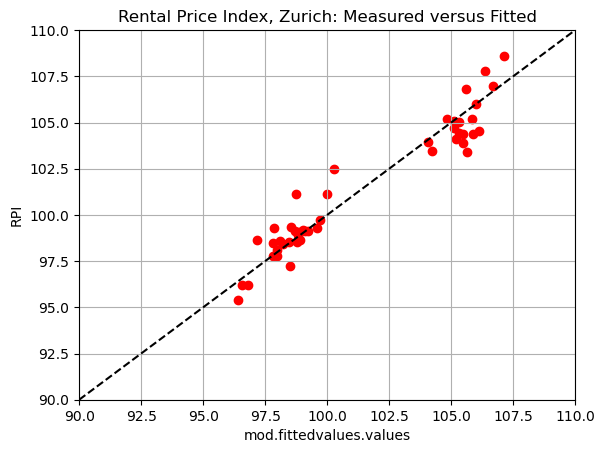

In [9]:
plt.close()
plt.xlim([90,110])
plt.ylim([90,110])
plt.scatter(data.RPI, mod.fittedvalues.values, color='red')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Rental Price Index, Zurich: Measured versus Fitted')
plt.xlabel('mod.fittedvalues.values')
plt.ylabel('RPI')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()

REMARKS: $92.7\%$ of the variability in the response is explained by the explanatory variables CPI and MI.
         This is a very good.

### (c) Confidence Interval on $\beta_1$

In [10]:
mod.conf_int(alpha=0.02)

,0,1
Intercept,-93.416581,-44.000035
CPI,1.402744,1.833861
MI,1.117831,2.895994


### (d) Prediction and Prediction Interval

data frame for the new observation

In [11]:
datanew = pd.DataFrame(data={'CPI': [100.5], 'MI': [4.5]})

prediction and $95\%$ prediction interval

In [12]:
mod.get_prediction(datanew).summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,102.962208,0.181934,102.595304,103.329113,100.897021,105.027396
